In [3]:
import torch
import torch.nn as nn
from IPython.display import Image

In [ ]:
max_sequence_length = 10   # maximum number of words that can passed throught the transformer simultaneously 
d_model  = 6  #Dimension of the embeddings (512 in GPT2)
#i is the position index

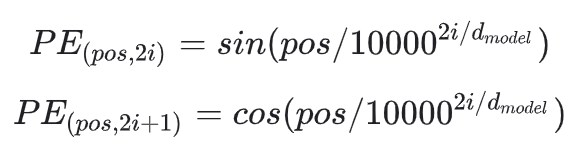

In [4]:
Image("positional_encoding_formula.png")

In [ ]:
#When i is even
even_i = torch.arange(0,d_model,2).float()
even_i

tensor([0., 2., 4.])

In [8]:
#When i is even full denominator
even_denominator = torch.pow(10000,(even_i)/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [9]:
#When i (index) is odd
odd_i  = torch.arange(1,d_model,2).float()
odd_i

tensor([1., 3., 5.])

In [ ]:
#When i is odd full denominator
odd_denominator = torch.pow(10000,(odd_i-1)/d_model)   #Note odd-1
odd_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [13]:
#As a result both output for odd and even are same so we use one variable for both instead
denominator = odd_denominator = even_denominator

In [17]:
#Define every single position as a row vector
position = torch.arange(max_sequence_length, dtype=torch.float).reshape(max_sequence_length,1)
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [18]:
#Positional encoding final output
even_positional_enc = torch.sin(position/denominator)
odd_position_enc  = torch.cos(position/denominator)

In [22]:
even_positional_enc, even_positional_enc.shape

(tensor([[ 0.0000,  0.0000,  0.0000],
         [ 0.8415,  0.0464,  0.0022],
         [ 0.9093,  0.0927,  0.0043],
         [ 0.1411,  0.1388,  0.0065],
         [-0.7568,  0.1846,  0.0086],
         [-0.9589,  0.2300,  0.0108],
         [-0.2794,  0.2749,  0.0129],
         [ 0.6570,  0.3192,  0.0151],
         [ 0.9894,  0.3629,  0.0172],
         [ 0.4121,  0.4057,  0.0194]]),
 torch.Size([10, 3]))

In [21]:
odd_position_enc, odd_position_enc.shape

(tensor([[ 1.0000,  1.0000,  1.0000],
         [ 0.5403,  0.9989,  1.0000],
         [-0.4161,  0.9957,  1.0000],
         [-0.9900,  0.9903,  1.0000],
         [-0.6536,  0.9828,  1.0000],
         [ 0.2837,  0.9732,  0.9999],
         [ 0.9602,  0.9615,  0.9999],
         [ 0.7539,  0.9477,  0.9999],
         [-0.1455,  0.9318,  0.9999],
         [-0.9111,  0.9140,  0.9998]]),
 torch.Size([10, 3]))

In [23]:
#Stack all the "should be " scenario (even and odd positions)
stacked = torch.stack([even_positional_enc,odd_position_enc], dim=2)
stacked.shape

torch.Size([10, 3, 2])

In [26]:
#Flatten to get a very clear output of stacked pe indices
positional_encoding = torch.flatten(stacked, start_dim=1, end_dim=2)
positional_encoding, positional_encoding.shape

(tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
         [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
         [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
         [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
         [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
         [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
         [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
         [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
         [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
         [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]]),
 torch.Size([10, 6]))

In [37]:
#Positional Encoding as a Full class 
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_sequence_length):  #T,n_embd in our model
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model
    def forward(self):
        even_i = torch.arange(0,self.d_model,2).float()
        denominator = torch.pow(10000, even_i/d_model)
        position = torch.arange(self.max_sequence_length).reshape(self.max_sequence_length,1)
        even_pe = torch.sin(position/denominator)
        odd_pe = torch.cos(position/denominator)
        stacked = torch.stack([even_pe,odd_pe], dim=2)
        pe = torch.flatten(stacked,start_dim=1, end_dim=2)
        return pe

In [38]:
pe  = PositionalEncoding(d_model = 6, max_sequence_length=10)
pe.forward()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])